<h4> Exploratory Data Analysis </h4>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/cleaned_vgsales_no_outliers.csv')


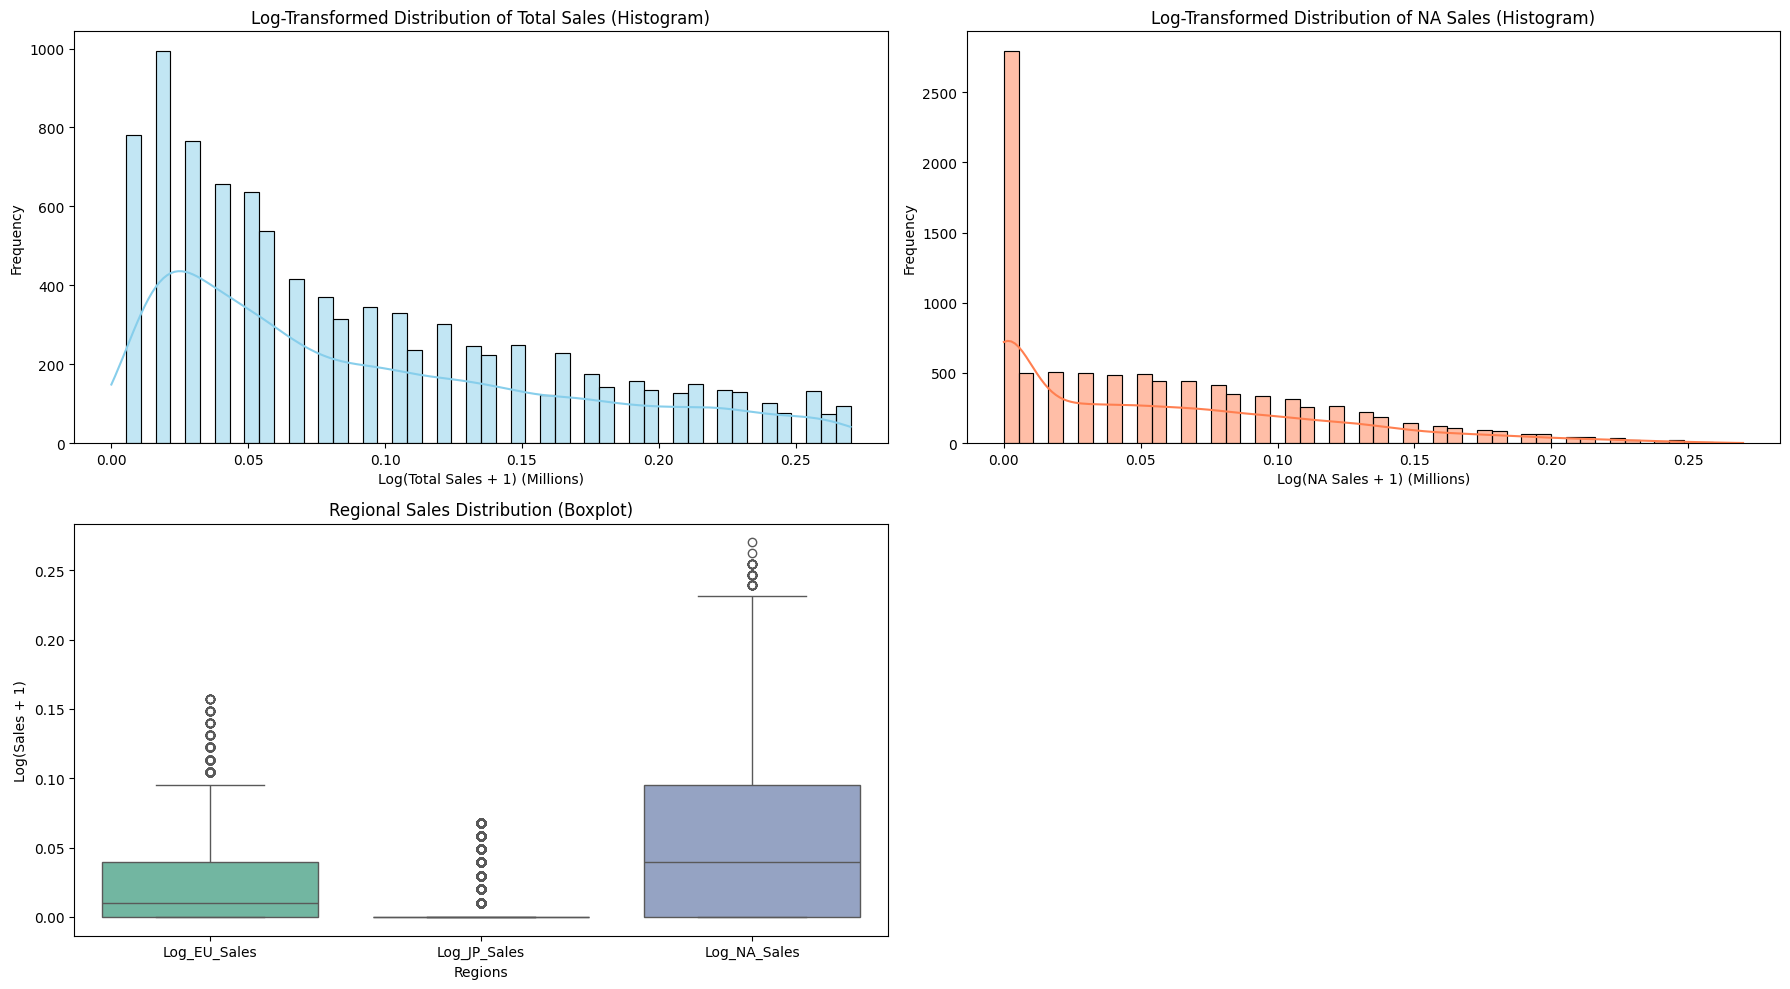

In [9]:
df['Log_Total_Sales'] = np.log1p(df['Total_Sales'])
df['Log_EU_Sales'] = np.log1p(df['EU_Sales'])
df['Log_JP_Sales'] = np.log1p(df['JP_Sales'])
df['Log_NA_Sales'] = np.log1p(df['NA_Sales'])

# Filtering out extreme outliers based on a threshold
threshold = np.percentile(df['Log_Total_Sales'], 95)
df_filtered = df[df['Log_Total_Sales'] <= threshold]

plt.figure(figsize=(18, 10))

# Histogram: Total Sales
plt.subplot(2, 2, 1)
sns.histplot(df_filtered['Log_Total_Sales'], kde=True, bins=50, color='skyblue', edgecolor='black')
plt.title('Log-Transformed Distribution of Total Sales (Histogram)')
plt.xlabel('Log(Total Sales + 1) (Millions)')
plt.ylabel('Frequency')

# Histogram: NA Sales
plt.subplot(2, 2, 2)
sns.histplot(df_filtered['Log_NA_Sales'], kde=True, bins=50, color='coral', edgecolor='black')
plt.title('Log-Transformed Distribution of NA Sales (Histogram)')
plt.xlabel('Log(NA Sales + 1) (Millions)')
plt.ylabel('Frequency')

# Boxplot: Regional Sales vs Total Sales
plt.subplot(2, 2, 3)
sns.boxplot(data=df_filtered[['Log_EU_Sales', 'Log_JP_Sales', 'Log_NA_Sales']], palette='Set2')
plt.title('Regional Sales Distribution (Boxplot)')
plt.xlabel('Regions')
plt.ylabel('Log(Sales + 1)')

plt.tight_layout()
plt.show()

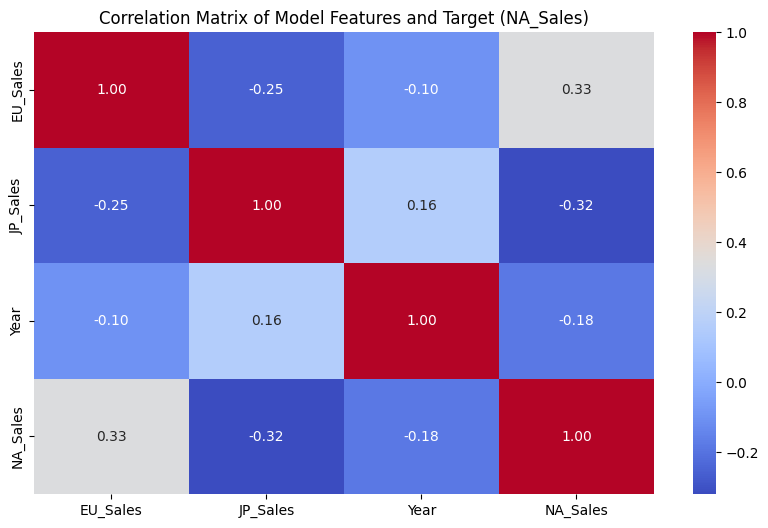

In [6]:
df = pd.get_dummies(df, columns=['Platform', 'Genre'], drop_first=True)

model_columns = ['EU_Sales', 'JP_Sales', 'Year', 'NA_Sales']
correlation_matrix = df[model_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Model Features and Target (NA_Sales)')
plt.show()